In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
df = pd.read_csv('Popular_Baby_Names_Clean.csv')

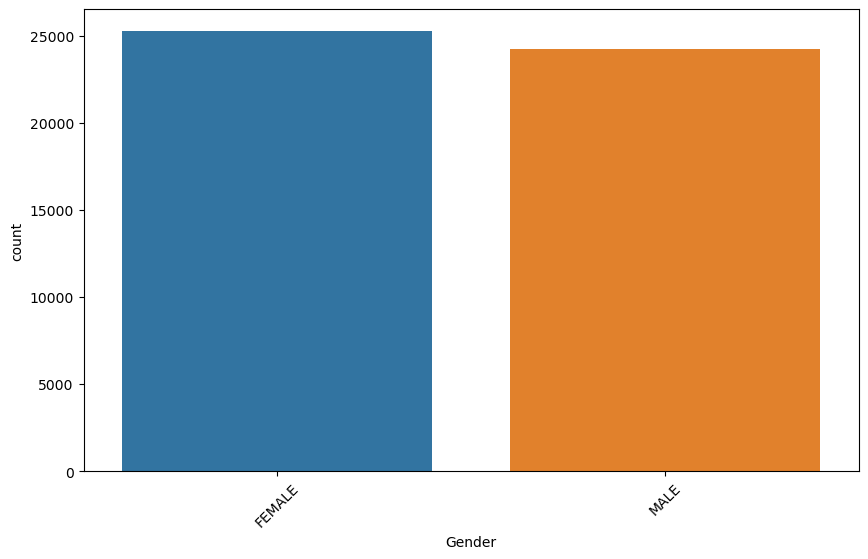

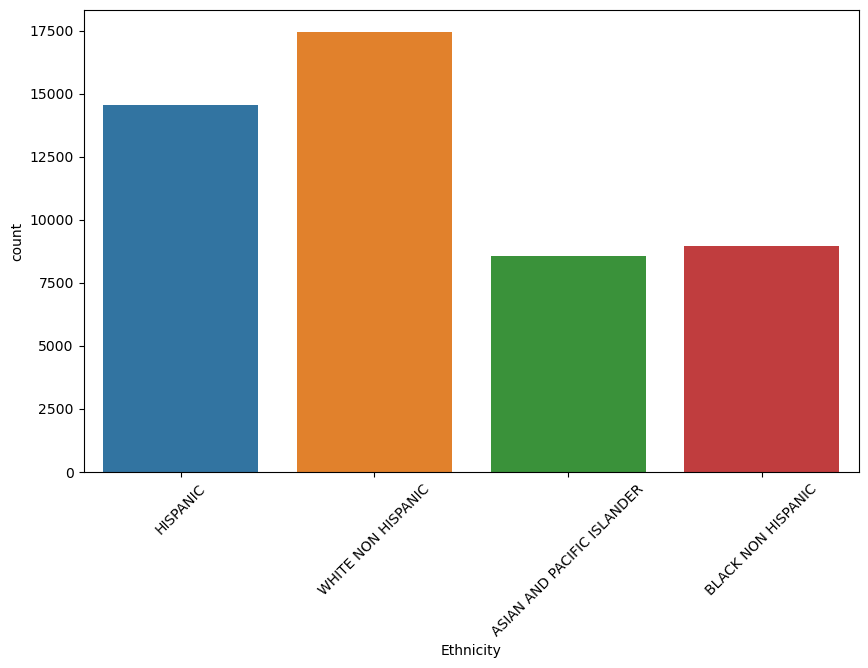

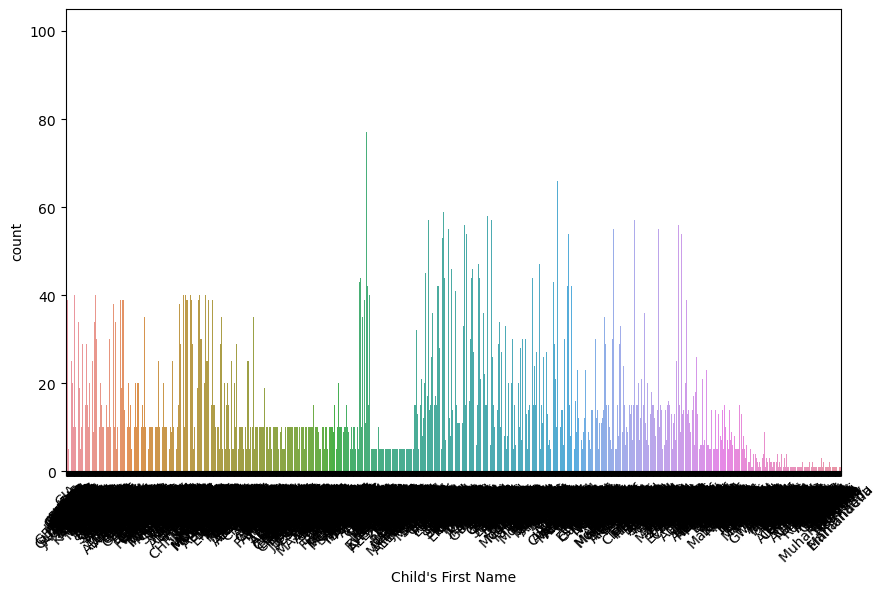

In [8]:
for column in df.select_dtypes(include='object'):  # Iterate through categorical columns
    plt.figure(figsize=(10, 6))  # Set the size of the plot
    sns.countplot(data=df, x=column)  # Create a bar plot
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.show()  # Display the plot

In [9]:
# Convert the "Name" column to a string data type
df["Child's First Name"] = df["Child's First Name"].astype(str)
df['Ethnicity'] = df['Ethnicity'].astype(str)
df['Gender'] = df['Gender'].astype(str)

# Capitalize the first letter of each name
df["Child's First Name"] = df["Child's First Name"].str.capitalize()
df["Ethnicity"] = df["Ethnicity"].str.capitalize()
df['Gender'] = df['Gender'].str.capitalize()

In [10]:
df.to_csv("Popular_Names_EUA.csv",index=False)

In [ ]:
df = pd.read_csv('Names_Babies.csv')

In [ ]:
df['Ethnicity'] = df['Ethnicity'].replace('old_value', 'new_value')
print(df)
plt.show()

In [ ]:
sns.set(style="darkgrid")
sns.countplot(x='Year of Birth', data=df, hue='Gender')
plt.title('Number of Babies Born by Year and Gender')
plt.show()


In [ ]:
df_popular_names = df.groupby(['Year of Birth', "Child's First Name", 'Gender'], as_index=False)['Count'].sum()
df_popular_names = df_popular_names.sort_values(by=['Year of Birth', 'Count', 'Gender'], ascending=False).groupby(['Year of Birth', 'Gender']).head(5)
sns.catplot(x='Year of Birth', y="Child's First Name", data=df_popular_names, hue='Gender', kind='bar', height=10, aspect=0.6, legend_out=False)
plt.title('Most Popular Baby Names by Year')
plt.show()


In [ ]:
df_name = df[df["Child's First Name"] == 'Maria']
sns.lineplot(x='Year of Birth', y='Count', data=df_name)
plt.title('Popularity of Name "Maria" Over Time')
plt.show()


In [ ]:
# Group the data by name and sum the counts across all years
df_most_popular = df.groupby("Child's First Name")['Count'].sum().reset_index()

# Sort the data in descending order of popularity
df_most_popular = df_most_popular.sort_values(by='Count', ascending=False)

# Take the top 10 most popular names
df_most_popular = df_most_popular.head(10)

# Create a bar chart of the top 10 most popular names
sns.barplot(x="Child's First Name", y='Count', data=df_most_popular)
plt.title('Top 10 Most Popular Names Across All Periods')
plt.xlabel("Child's First Name")
plt.ylabel('Count')
plt.show()

# Print the most popular name ever used
print("The most popular name ever used is '{}' with {} total occurrences.".format(df_most_popular.iloc[0]["Child's First Name"], df_most_popular.iloc[0]['Count']))
